# Quantifying Shakespeare

In this notebook we will:

1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
3. Visualize the results of the frequencies

Here's the [dataset](https://bit.ly/shakespeare-txt)

In [4]:
# Read the lines into a list

from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read every line of filename into a list of its strings."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        line = line.lower()
        line = line.strip()
        lines.append(line)
    file_handle.close()
    return lines


# always start by opening the file and closing the file, fill out the middle after
# strip method removes tabs and spaces from a string (\n and \t)

# ./ references a file in the same directory with the name shakespeare.txt
shakespeare_lines: list[str] = read_lines("./shakespeare.txt")
len(shakespeare_lines)

124438

In [17]:
# Tally up characters

# Goal: Define a function named "tally"
# It takes 2 parameters: 1. A reference to a dict[str, int] 2. A str that refers to a key in the dictionary being tallied
# Logic: If the str/key is in the dict, increase its value by one; otherwise, set its value to 1 in the dictionary
# This a procedure, a function that returns nothing


def tally(counts: dict[str, int], key: str) -> None:
    """Tallies the amount of times a string appears in a dictionary of strings."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequencies of all letters in lines."""
    counts: dict[str, int] = {}
    for line in lines:
        for char in line:
            if char >= "a" and char <= "z":
            # or "if char.isalpha()" to see if the character is an a-z character
                tally(counts, char)
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
shakespeare_letters

{'t': 329746,
 'h': 236853,
 'i': 253949,
 's': 248959,
 'e': 447148,
 'x': 5292,
 'f': 80507,
 'l': 169996,
 'p': 58451,
 'r': 237828,
 'n': 243240,
 'd': 149443,
 'b': 61943,
 'y': 94360,
 'o': 314559,
 'j': 4778,
 'c': 88163,
 'g': 68193,
 'u': 128938,
 'a': 289126,
 'w': 89383,
 'm': 111438,
 'k': 35404,
 'v': 37566,
 'z': 1631,
 'q': 3582}

In [25]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
# items() method accesses each key-value pair in a dictionary 
items_in_dict = sorted(items_in_dict)
shakespeare_letters_sorted: dict[str, int] = dict(items_in_dict)
items_in_dict

[('a', 289126),
 ('b', 61943),
 ('c', 88163),
 ('d', 149443),
 ('e', 447148),
 ('f', 80507),
 ('g', 68193),
 ('h', 236853),
 ('i', 253949),
 ('j', 4778),
 ('k', 35404),
 ('l', 169996),
 ('m', 111438),
 ('n', 243240),
 ('o', 314559),
 ('p', 58451),
 ('q', 3582),
 ('r', 237828),
 ('s', 248959),
 ('t', 329746),
 ('u', 128938),
 ('v', 37566),
 ('w', 89383),
 ('x', 5292),
 ('y', 94360),
 ('z', 1631)]

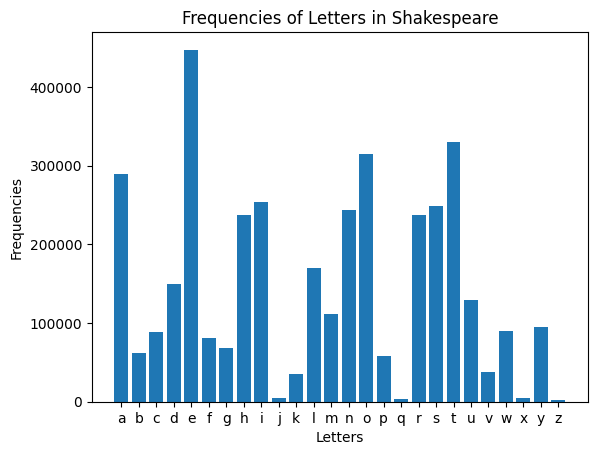

In [27]:
# Make a bar chart

from matplotlib import pyplot

pyplot.title("Frequencies of Letters in Shakespeare")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(shakespeare_letters_sorted.keys())
# takes the keys from a dictionary and uses the list constructor to form a list of the keys
values: list[int] = list(shakespeare_letters_sorted.values())
pyplot.bar(labels, values);